In [1]:
import pandas as pd
import numpy as np
import gspread
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
gc = gspread.service_account(filename='/home/gbotemi/Documents/gbotemi_bolarinwa/project-1/secret.json') # use your google service file account here
file = "https://docs.google.com/spreadsheets/d/1SUlcukpgxf6pfFQbj6DKQZXSlOhyBOSuBdbmQ2ZbhTM/edit?usp=sharing"

sh = gc.open_by_url(file)
worksheet = sh.get_worksheet(0)
df = pd.DataFrame(worksheet.get_all_records())

In [32]:
data = df.copy() # keep a copy of the original dataframe
data.columns = data.columns.str.lower() # lower columns values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15364 entries, 0 to 15363
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   permit number                           15364 non-null  object 
 1   permit type                             15364 non-null  int64  
 2   permit type definition                  15364 non-null  object 
 3   permit creation date                    15364 non-null  object 
 4   block                                   15364 non-null  object 
 5   lot                                     15364 non-null  object 
 6   street number                           15364 non-null  int64  
 7   street number suffix                    15364 non-null  object 
 8   street name                             15364 non-null  object 
 9   street suffix                           15364 non-null  object 
 10  unit                                    15364 non-null  ob

In [33]:
data.shape

(15364, 43)

In [34]:
data.head()

,permit number,permit type,permit type definition,permit creation date,block,lot,street number,street number suffix,street name,street suffix,unit,unit suffix,description,current status,current status date,filed date,issued date,completed date,first construction document date,structural notification,number of existing stories,number of proposed stories,voluntary soft-story retrofit,fire only permit,permit expiration date,estimated cost,revised cost,existing use,existing units,proposed use,proposed units,plansets,tidf compliance,existing construction type,existing construction type description,proposed construction type,proposed construction type description,site permit,supervisor district,neighborhoods - analysis boundaries,zipcode,location,record id
0,201505000000.0,4,sign - erect,05/06/2015,326,23,140,,Ellis,St,,,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,,11/09/2015,,6,,,,11/03/2016,4000,4000,tourist hotel/motel,143,,,2,,3,constr type 3,,,,3,Tenderloin,94102,"(37.785719256680785, -122.40852313194863)",1.380610e+12
1,201604000000.0,4,sign - erect,04/19/2016,306,7,440,,Geary,St,0,,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,,08/03/2017,,7,,,,12/03/2017,1,500,tourist hotel/motel,,,,2,,3,constr type 3,,,,3,Tenderloin,94102,"(37.78733980600732, -122.41063199757738)",1.420160e+12
2,201605000000.0,3,additions alterations or repairs,05/27/2016,595,203,1647,,Pacific,Av,,,installation of separating wall,withdrawn,09/26/2017,05/27/2016,,,,,6,6,,,,20000,,retail sales,39,retail sales,39,2,,1,constr type 1,1,constr type 1,,3,Russian Hill,94109,"(37.7946573324287, -122.42232562979227)",1.424860e+12
3,201611000000.0,8,otc alterations permit,11/07/2016,156,11,1230,,Pacific,Av,0,,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,,2,2,,,07/13/2018,2000,2000,1 family dwelling,1,1 family dwelling,1,2,,5,wood frame (5),5,wood frame (5),,3,Nob Hill,94109,"(37.79595867909168, -122.41557405519474)",1.443570e+12
4,201611000000.0,6,demolitions,11/28/2016,342,1,950,,Market,St,,,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,,11/20/2017,,3,,,,12/01/2018,100000,100000,retail sales,,,,2,,3,constr type 3,,,,6,Tenderloin,94102,"(37.78315261897309, -122.40950883997789)",1.445480e+11


In [35]:
data = data.replace("", np.nan) #replace empty strings with numpy nan values

In [38]:
def check_missing_cols(data: pd.DataFrame) -> list:
    """
    check missing columns and return result in percentage
    """
    sum_of_missing_data = data.isna().sum()
    missing_col_dict = sum_of_missing_data.to_dict()
    # missing_col_dict
    
    missing_cols = [idx for idx in missing_col_dict.keys() if int(missing_col_dict[idx]) > 0]
    print((data[missing_cols].isna().sum() / len(data)) * 100)

    return None
    

In [39]:
check_missing_cols(data)

street number suffix                       98.958605
street suffix                               1.262692
unit                                       86.025775
unit suffix                                98.834939
description                                 0.162718
issued date                                 4.133038
completed date                             40.581880
first construction document date            4.159073
structural notification                    96.953918
number of existing stories                 20.756313
number of proposed stories                 22.038532
voluntary soft-story retrofit              99.928404
fire only permit                           90.751106
permit expiration date                     22.520177
estimated cost                             18.790680
revised cost                                1.607654
existing use                               20.164020
existing units                             25.494663
proposed use                               21.

### Handling Datetime data

In [42]:
# convert date time features into datetime object

data["issued date"] = pd.to_datetime(data["issued date"])
data["completed date"] = pd.to_datetime(data["completed date"])
data["first construction document date"] = pd.to_datetime(data["first construction document date"])
data["completed date"] = pd.to_datetime(data["completed date"])
data["permit expiration date"] = pd.to_datetime(data["permit expiration date"])
data["permit creation date"] = pd.to_datetime(data["permit creation date"])
data["filed date"] = pd.to_datetime(data["filed date"])

In [43]:
# select datatime object and store it in a list
date_cols = data.select_dtypes(include="datetime").columns
date_cols_list = date_cols.to_list()

for idx in date_cols_list:
    mode = data[idx].mode()[0] # store the mode of the index cols 
    data[idx].fillna(mode, inplace=True) # fill the missing rows with the mode
print("success...")

success...


In [44]:
check_missing_cols(data)

street number suffix                       98.958605
street suffix                               1.262692
unit                                       86.025775
unit suffix                                98.834939
description                                 0.162718
structural notification                    96.953918
number of existing stories                 20.756313
number of proposed stories                 22.038532
voluntary soft-story retrofit              99.928404
fire only permit                           90.751106
estimated cost                             18.790680
revised cost                                1.607654
existing use                               20.164020
existing units                             25.494663
proposed use                               21.693569
proposed units                             26.152044
plansets                                   18.582400
tidf compliance                           100.000000
existing construction type                 21.

### Handling Large missing data

Drop missing data that are over 60%   
https://www.sciencedirect.com/science/article/pii/S0895435618308710#:~:text=Statistical%20guidance%20articles%20have%20stated,18%5D%2C%20%5B19%5D.

In [45]:
# store large missing values greater than 60% in a dictionary and then store the columns in a list
large_missing_dict = ((data.isna().sum() / len(data)) * 100).to_dict() 
large_missing_cols = [idx for idx in large_missing_dict.keys() if large_missing_dict.get(idx) > 60]

In [46]:
data = data.drop(columns=large_missing_cols) # drop features missing more than 60%

In [47]:
check_missing_cols(data)

street suffix                              1.262692
description                                0.162718
number of existing stories                20.756313
number of proposed stories                22.038532
estimated cost                            18.790680
revised cost                               1.607654
existing use                              20.164020
existing units                            25.494663
proposed use                              21.693569
proposed units                            26.152044
plansets                                  18.582400
existing construction type                21.088258
existing construction type description    21.088258
proposed construction type                22.240302
proposed construction type description    22.240302
supervisor district                        0.774538
neighborhoods - analysis boundaries        0.774538
zipcode                                    0.774538
location                                   0.768029
dtype: float

### Handling Duplicates

In [48]:
print(f"No of duplicates: {data.duplicated().sum()}") # check for duplicates
data = data.drop_duplicates(keep="first") # drop duplicated data

### Handling missing data less than 60%

In [49]:
# store missing values lesser than 60% in a dictionary and then store the columns in a list

small_missing_dict = ((data.isna().sum() / len(data)) * 100).to_dict()
small_missing_cols = [idx for idx in small_missing_dict.keys() if small_missing_dict.get(idx) > 0]

In [50]:
data[["zipcode", "location", "neighborhoods - analysis boundaries"]].isna().sum()
# looks like the following columns are correlated and would be best to drop the missing values. Imputing geolocation data might not be a very good idea

zipcode                                119
location                               118
neighborhoods - analysis boundaries    119
dtype: int64

In [52]:
# dropping empty geolocation data (zipcode, location and neighborhoods - analysis boundaries)
data = data[(data['location'].notnull()) & (data['zipcode'].notnull()) & (data['neighborhoods - analysis boundaries'].notnull())] 

In [53]:
data['description'] = data['description'].fillna("Unknown") # filling unknown for description data

In [54]:
check_missing_cols(data)

street suffix                              1.261913
number of existing stories                20.644101
number of proposed stories                21.846862
estimated cost                            18.665790
revised cost                               1.623398
existing use                              20.046007
existing units                            25.363128
proposed use                              21.498521
proposed units                            25.967795
plansets                                  18.455472
existing construction type                20.979297
existing construction type description    20.979297
proposed construction type                22.050608
proposed construction type description    22.050608
dtype: float64


### Using MICEFOREST to handle the rest of the missing data

In [20]:
from miceforest import ImputationKernel

In [55]:
# convert object cols to catgorical columns
object_cols = data.select_dtypes(include="object").columns
data[object_cols] = data[object_cols].astype("category")

In [56]:
# miceforest cant handle datetime object, dropping the datetime features will be better
impute_data = data.select_dtypes(exclude="datetime")

In [57]:
# run miceforest imputationalkernel on the impute data
mice_kernel = ImputationKernel(data=impute_data, save_all_iterations=True, random_state=42)
mice_kernel.mice(2, n_jobs=2)

In [58]:
mice_kernel.complete_data

<bound method ImputedData.complete_data of               Class: ImputationKernel
           Datasets: 5
         Iterations: 2
  Imputed Variables: 14
save_all_iterations: True>

In [59]:
mice_col = mice_kernel.complete_data(4).columns.to_list() # get the col of the data that imputed with miceforest
data[mice_col] = mice_kernel.complete_data(4) # fill the data with miceforest results

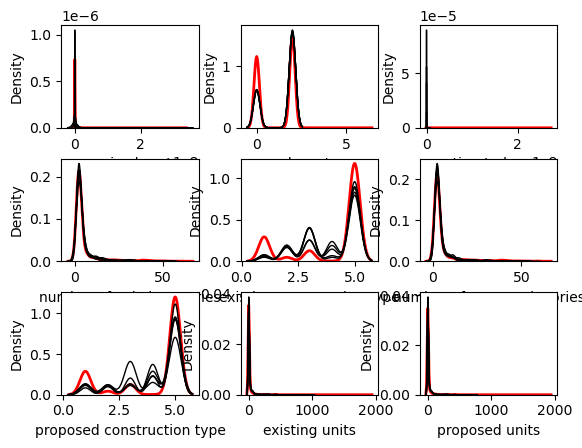

In [61]:
mice_kernel.plot_imputed_distributions(wspace=0.3,hspace=0.3) # plot imputed distribution of the imputed data

In [64]:
data.isna().sum() # no more missing columns

permit number                             0
permit type                               0
permit type definition                    0
permit creation date                      0
block                                     0
lot                                       0
street number                             0
street name                               0
street suffix                             0
description                               0
current status                            0
current status date                       0
filed date                                0
issued date                               0
completed date                            0
first construction document date          0
number of existing stories                0
number of proposed stories                0
permit expiration date                    0
estimated cost                            0
revised cost                              0
existing use                              0
existing units                  

In [63]:
data.to_csv("data/cleaned_data.csv", index=False) # export cleaned data to csv